### Decision Tree ###

In [311]:
import pandas as pd

In [312]:
#df = pd.read_csv("../data/kickstarter_cleaned.csv")
df = pd.read_csv("../data/kickstarter_one_hot_cleaned.csv")

In [313]:
#one-hot encode

#category
df_encoded = pd.get_dummies(df, columns=['category'])

In [314]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#eliminate all non-numerical columns
df = df.select_dtypes(include=['number'])
df.drop([
    'usd_pledged', 'goal'
], axis=1)

#print(df.columns)
#print(df.head(2))

#y is the target feature
y = df['SuccessfulBool']
#X consists of all features other than the target feature
X = df.drop('SuccessfulBool', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

spotlight                      1.0
goal                           0.0
launched_at_day                0.0
world                          0.0
new                            0.0
help                           0.0
app                            0.0
DeadlineWeekend                0.0
LaunchedTuesday                0.0
TOPCOUNTRY                     0.0
launch_to_state_change_days    0.0
launch_to_deadline_days        0.0
create_to_launch_days          0.0
launched_at_hr                 0.0
launched_at_yr                 0.0
launched_at_month              0.0
disable_communication          0.0
created_at_hr                  0.0
created_at_day                 0.0
created_at_month               0.0
deadline_hr                    0.0
deadline_day                   0.0
deadline_month                 0.0
blurb_len_clean                0.0
name_len_clean                 0.0
usd_pledged                    0.0
static_usd_rate                0.0
backers_count                  0.0
staff_pick          

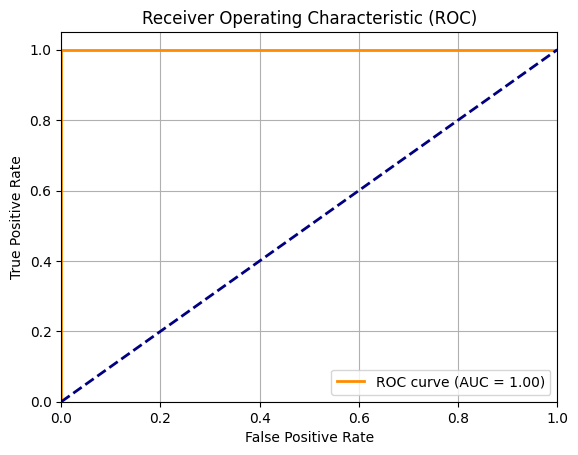

spotlight                      1.0
goal                           0.0
launched_at_day                0.0
world                          0.0
new                            0.0
help                           0.0
app                            0.0
DeadlineWeekend                0.0
LaunchedTuesday                0.0
TOPCOUNTRY                     0.0
launch_to_state_change_days    0.0
launch_to_deadline_days        0.0
create_to_launch_days          0.0
launched_at_hr                 0.0
launched_at_yr                 0.0
launched_at_month              0.0
disable_communication          0.0
created_at_hr                  0.0
created_at_day                 0.0
created_at_month               0.0
deadline_hr                    0.0
deadline_day                   0.0
deadline_month                 0.0
blurb_len_clean                0.0
name_len_clean                 0.0
usd_pledged                    0.0
static_usd_rate                0.0
backers_count                  0.0
staff_pick          

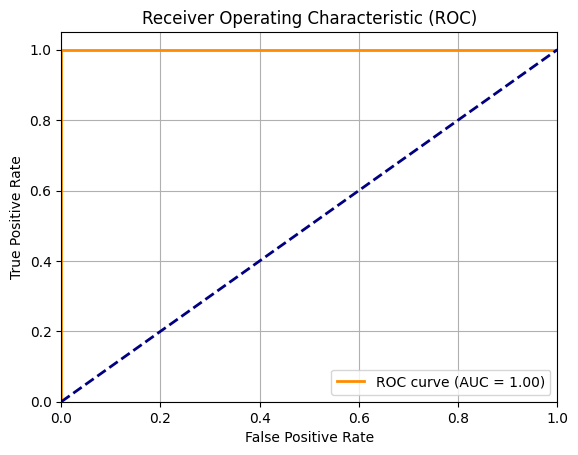

spotlight                      1.0
goal                           0.0
launched_at_day                0.0
world                          0.0
new                            0.0
help                           0.0
app                            0.0
DeadlineWeekend                0.0
LaunchedTuesday                0.0
TOPCOUNTRY                     0.0
launch_to_state_change_days    0.0
launch_to_deadline_days        0.0
create_to_launch_days          0.0
launched_at_hr                 0.0
launched_at_yr                 0.0
launched_at_month              0.0
disable_communication          0.0
created_at_hr                  0.0
created_at_day                 0.0
created_at_month               0.0
deadline_hr                    0.0
deadline_day                   0.0
deadline_month                 0.0
blurb_len_clean                0.0
name_len_clean                 0.0
usd_pledged                    0.0
static_usd_rate                0.0
backers_count                  0.0
staff_pick          

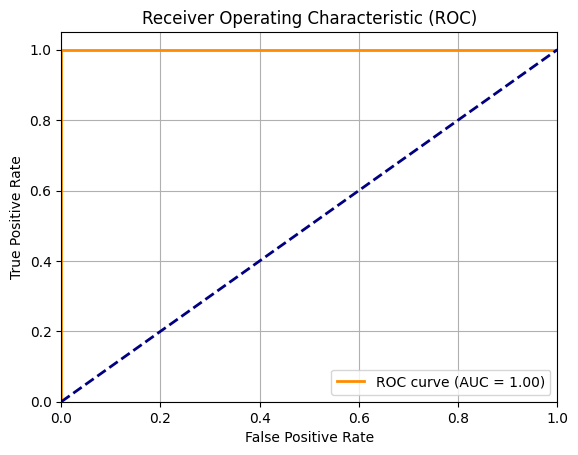

spotlight                      1.0
goal                           0.0
launched_at_day                0.0
world                          0.0
new                            0.0
help                           0.0
app                            0.0
DeadlineWeekend                0.0
LaunchedTuesday                0.0
TOPCOUNTRY                     0.0
launch_to_state_change_days    0.0
launch_to_deadline_days        0.0
create_to_launch_days          0.0
launched_at_hr                 0.0
launched_at_yr                 0.0
launched_at_month              0.0
disable_communication          0.0
created_at_hr                  0.0
created_at_day                 0.0
created_at_month               0.0
deadline_hr                    0.0
deadline_day                   0.0
deadline_month                 0.0
blurb_len_clean                0.0
name_len_clean                 0.0
usd_pledged                    0.0
static_usd_rate                0.0
backers_count                  0.0
staff_pick          

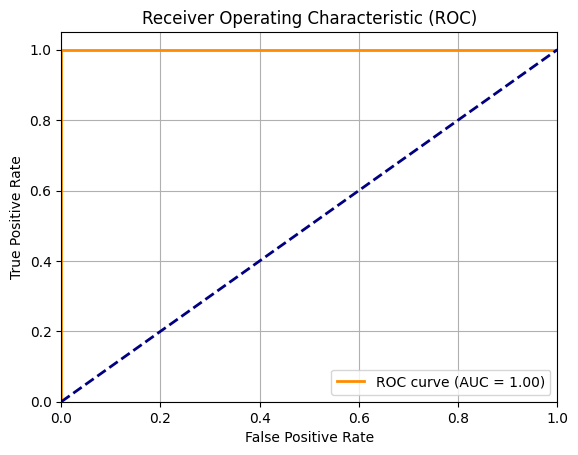

In [315]:
for i in range(1, 5):
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train)

    cv_scores = cross_val_score(clf, X, y, cv=10)

    #examine the feature importance
    importances = clf.feature_importances_
    feature_ranks = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print(feature_ranks)
    #split_feature_index = clf.tree_.feature[0]
    #print("Split on feature:", X.columns[split_feature_index])

    print(f"Tree depth {i}")
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.4f}")
    print(f"Standard deviation of accuracy: {cv_scores.std():.4f}")

    y_scores = clf.predict_proba(X_test)[:, 1]  # Get probability for the positive class

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
        

In [316]:
#messing around with sample prediction
print(clf.predict(X.iloc[0:1]))

[0]


`Spotlight` is a problem here. It seems that the target is leaked to the training by the `spotlight`. Looking more into it, the spotlight on kickstarter features projects that were already successful. E.g. only a successful kickstarter will reach the kickstarter spotlight.

We need to omit the spotlight feature to avoid leakage of the target feature to the training data.

Re-reading the assignment, only launch day data should be used for predictions so more features should be omitted.

In [317]:
#drop spotlight and any other features that will leak

features_to_drop = ['usd_pledged', 'state_changed_at', 'staff_pick', 'backers_count', 'spotlight', 'launch_to_state_change_days', 'state_changed_at_weekday_Friday', 'state_changed_at_weekday_Monday', 'state_changed_at_weekday_Saturday', 'state_changed_at_weekday_Sunday', 'state_changed_at_weekday_Thursday', 'state_changed_at_weekday_Tuesday', 'state_changed_at_weekday_Wednesday']
print(df.columns.to_list())

def safe_drop_columns(df, features_to_drop):
    for column in features_to_drop:
        if column in df.columns.tolist():
            df.drop(column, axis=1, inplace=True)
safe_drop_columns(df, features_to_drop)

#print(df.columns)

#print('usd_pledged' in df.columns)

#y is the target feature
y = df['SuccessfulBool']
#X consists of all features other than the target feature
X = df.drop('SuccessfulBool', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

['goal', 'disable_communication', 'staff_pick', 'backers_count', 'static_usd_rate', 'usd_pledged', 'spotlight', 'name_len_clean', 'blurb_len_clean', 'deadline_month', 'deadline_day', 'deadline_hr', 'created_at_month', 'created_at_day', 'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days', 'SuccessfulBool', 'TOPCOUNTRY', 'LaunchedTuesday', 'DeadlineWeekend', 'app', 'help', 'new', 'world', 'canceled']


Tree depth 1
goal    1.0
dtype: float64
Cross-validation scores: [0.70833333 0.70833333 0.70867668 0.70867668 0.70819195 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.7083
Standard deviation of accuracy: 0.0002


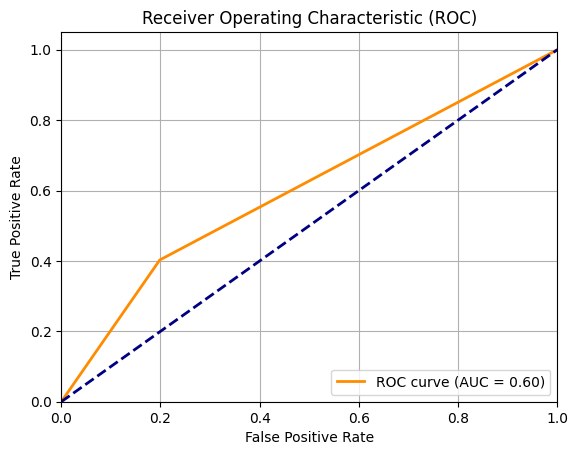

Tree depth 2
goal                     0.588885
create_to_launch_days    0.230594
canceled                 0.180522
dtype: float64
Cross-validation scores: [0.58381783 0.70833333 0.70867668 0.70867668 0.63548231 0.70819195
 0.70819195 0.70819195 0.70819195 0.70819195]
Mean accuracy: 0.6886
Standard deviation of accuracy: 0.0411


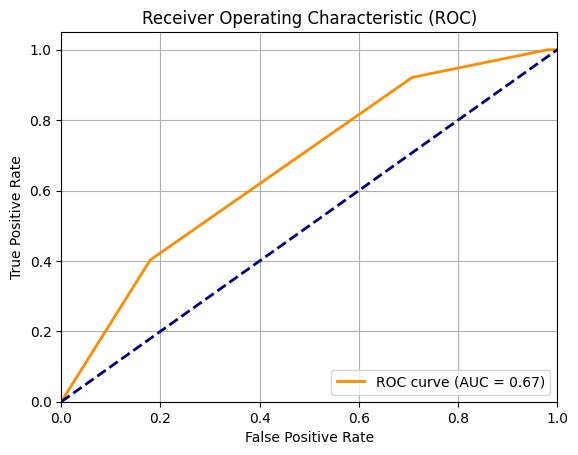

Tree depth 3
goal                     0.454356
canceled                 0.281414
create_to_launch_days    0.239382
launched_at_yr           0.024848
dtype: float64
Cross-validation scores: [0.68362403 0.74273256 0.7401842  0.78962676 0.68153175 0.71061561
 0.7120698  0.71449346 0.73533689 0.71546292]
Mean accuracy: 0.7226
Standard deviation of accuracy: 0.0299


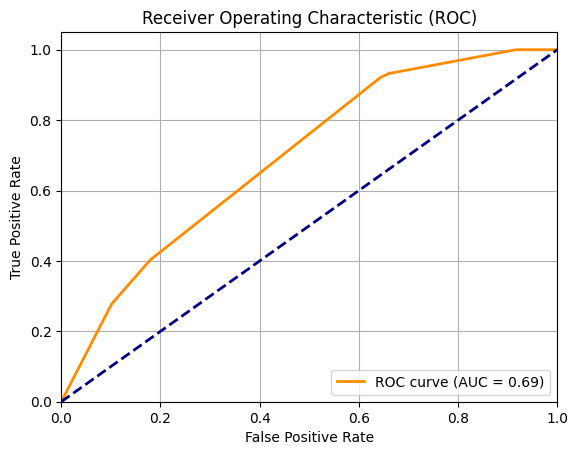

Tree depth 4
goal                       0.479314
canceled                   0.243681
create_to_launch_days      0.207285
launched_at_yr             0.041241
launch_to_deadline_days    0.028479
dtype: float64
Cross-validation scores: [0.64631783 0.75920543 0.75860397 0.7527872  0.68201648 0.74212312
 0.59912748 0.72952012 0.73630635 0.71691711]
Mean accuracy: 0.7123
Standard deviation of accuracy: 0.0508


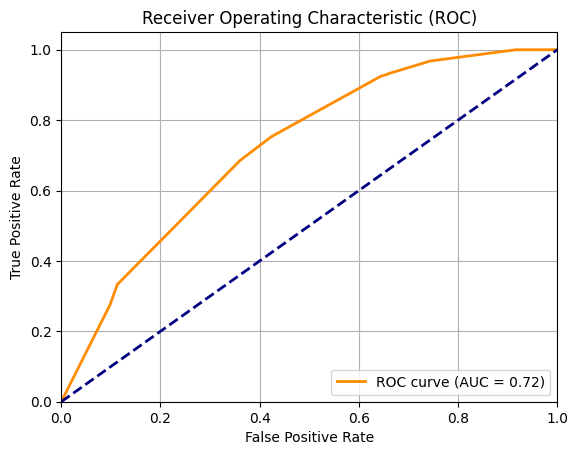

Tree depth 5
goal                       0.429846
canceled                   0.215810
create_to_launch_days      0.197333
name_len_clean             0.051160
launched_at_yr             0.036524
launch_to_deadline_days    0.035002
launched_at_hr             0.022105
disable_communication      0.012220
dtype: float64
Cross-validation scores: [0.67005814 0.76162791 0.76005817 0.77217644 0.65632574 0.71158507
 0.60058168 0.71546292 0.73630635 0.71885603]
Mean accuracy: 0.7103
Standard deviation of accuracy: 0.0513


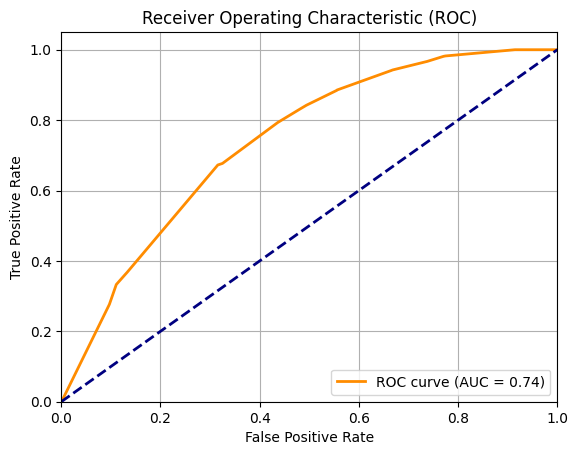

Tree depth 6
goal                       0.394099
canceled                   0.195102
create_to_launch_days      0.182853
name_len_clean             0.071553
launched_at_yr             0.064371
launch_to_deadline_days    0.037567
launched_at_hr             0.022629
disable_communication      0.011048
static_usd_rate            0.007457
app                        0.004699
created_at_hr              0.002980
deadline_day               0.002873
deadline_hr                0.002768
dtype: float64
Cross-validation scores: [0.65649225 0.76114341 0.76102763 0.77266117 0.65874939 0.72855065
 0.60688318 0.72079496 0.72467281 0.72031023]
Mean accuracy: 0.7111
Standard deviation of accuracy: 0.0510


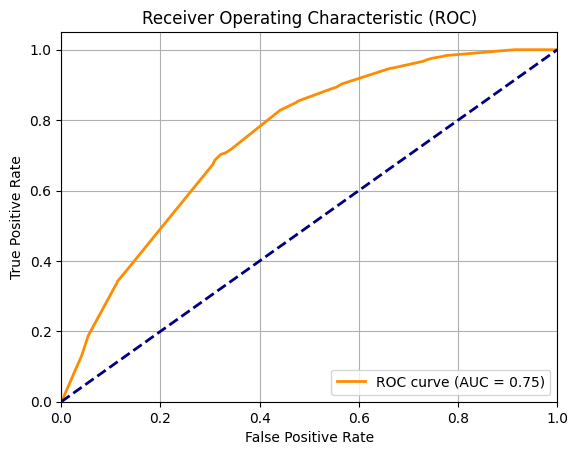

Tree depth 7
goal                       0.364982
create_to_launch_days      0.176587
canceled                   0.174651
name_len_clean             0.067541
launched_at_yr             0.061701
launch_to_deadline_days    0.053245
launched_at_hr             0.037254
deadline_hr                0.013625
disable_communication      0.009890
static_usd_rate            0.006675
deadline_day               0.006222
deadline_month             0.005744
launched_at_day            0.005462
created_at_day             0.005426
app                        0.004206
created_at_hr              0.002667
world                      0.001543
launched_at_month          0.001317
blurb_len_clean            0.001262
dtype: float64
Cross-validation scores: [0.66327519 0.76744186 0.76005817 0.78138633 0.64129908 0.72855065
 0.61076103 0.72127969 0.73679108 0.71449346]
Mean accuracy: 0.7125
Standard deviation of accuracy: 0.0537


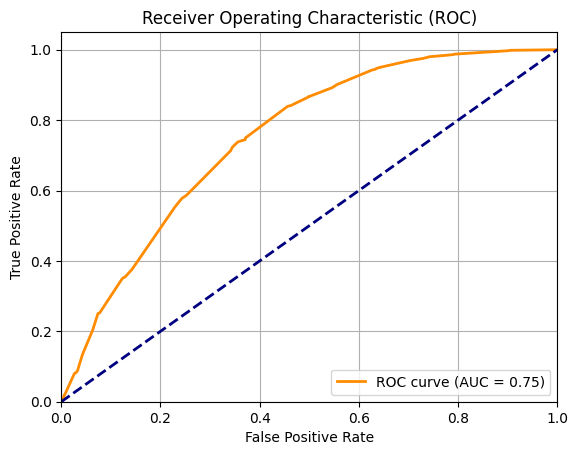

Tree depth 8
goal                       0.329096
create_to_launch_days      0.160056
canceled                   0.155290
launched_at_yr             0.059648
name_len_clean             0.058872
launch_to_deadline_days    0.057019
launched_at_hr             0.035668
deadline_hr                0.025952
static_usd_rate            0.016858
deadline_month             0.015481
created_at_day             0.011388
launched_at_day            0.010358
LaunchedTuesday            0.009670
world                      0.009288
blurb_len_clean            0.008794
disable_communication      0.008620
TOPCOUNTRY                 0.007870
deadline_day               0.007719
app                        0.005595
created_at_hr              0.005157
launched_at_month          0.001148
new                        0.000453
dtype: float64
Cross-validation scores: [0.65503876 0.74127907 0.77169171 0.79059622 0.64372273 0.72806592
 0.62481823 0.72952012 0.73582162 0.72709646]
Mean accuracy: 0.7148
Standard deviation o

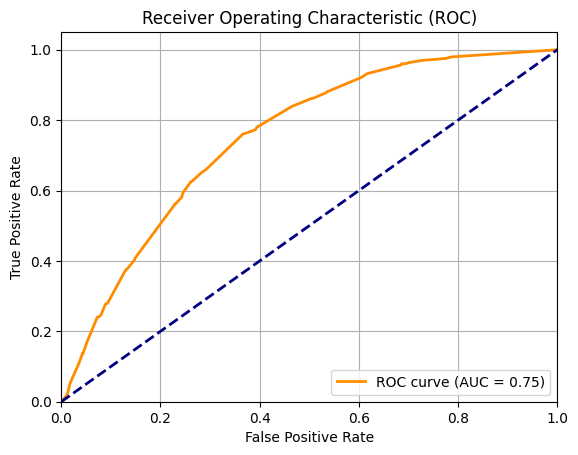

Tree depth 9
goal                       0.303531
create_to_launch_days      0.152053
canceled                   0.134687
launch_to_deadline_days    0.057553
name_len_clean             0.057488
launched_at_yr             0.052125
launched_at_hr             0.035349
deadline_hr                0.029717
static_usd_rate            0.025062
deadline_day               0.015738
world                      0.015479
deadline_month             0.015307
created_at_day             0.015170
created_at_hr              0.014679
disable_communication      0.011455
blurb_len_clean            0.011163
launched_at_day            0.009526
LaunchedTuesday            0.008387
new                        0.007258
launched_at_month          0.007142
TOPCOUNTRY                 0.006825
created_at_month           0.006087
app                        0.006016
help                       0.002205
dtype: float64
Cross-validation scores: [0.65649225 0.75726744 0.7464857  0.77120698 0.63208919 0.72321861
 0.63451285 0.73

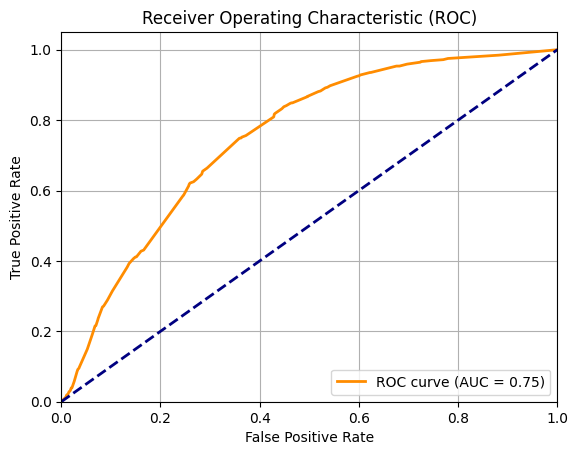

Tree depth 10
goal                       0.275355
create_to_launch_days      0.144161
canceled                   0.116809
launch_to_deadline_days    0.064451
launched_at_yr             0.053620
name_len_clean             0.053080
deadline_hr                0.044697
launched_at_hr             0.033375
static_usd_rate            0.022498
created_at_hr              0.020890
blurb_len_clean            0.020076
world                      0.019920
deadline_day               0.019373
deadline_month             0.016353
created_at_day             0.015451
launched_at_day            0.013694
new                        0.011095
disable_communication      0.009934
launched_at_month          0.009854
created_at_month           0.009562
TOPCOUNTRY                 0.007731
LaunchedTuesday            0.007274
app                        0.007261
help                       0.001912
DeadlineWeekend            0.001573
dtype: float64
Cross-validation scores: [0.66521318 0.72722868 0.74842462 0.76781386 0

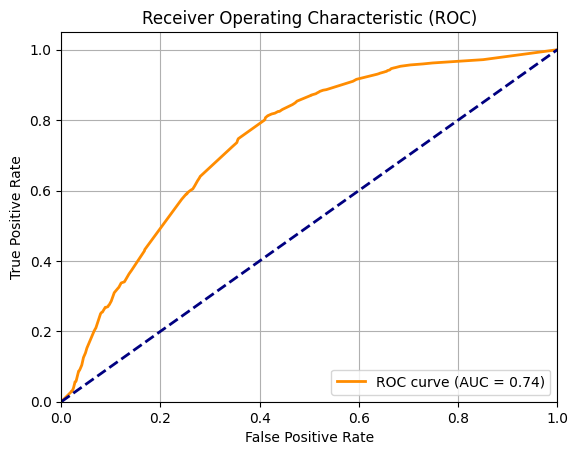

Tree depth 11
goal                       0.245736
create_to_launch_days      0.143098
canceled                   0.100889
launch_to_deadline_days    0.064448
launched_at_yr             0.051075
name_len_clean             0.049161
deadline_hr                0.039664
launched_at_hr             0.033319
created_at_hr              0.031181
static_usd_rate            0.028704
deadline_day               0.028103
blurb_len_clean            0.027504
created_at_month           0.024047
created_at_day             0.021385
world                      0.020491
deadline_month             0.020348
launched_at_day            0.016144
new                        0.011011
disable_communication      0.008580
launched_at_month          0.008375
app                        0.007124
LaunchedTuesday            0.007059
TOPCOUNTRY                 0.005113
help                       0.004888
DeadlineWeekend            0.002554
dtype: float64
Cross-validation scores: [0.66908915 0.71947674 0.74212312 0.77605429 0

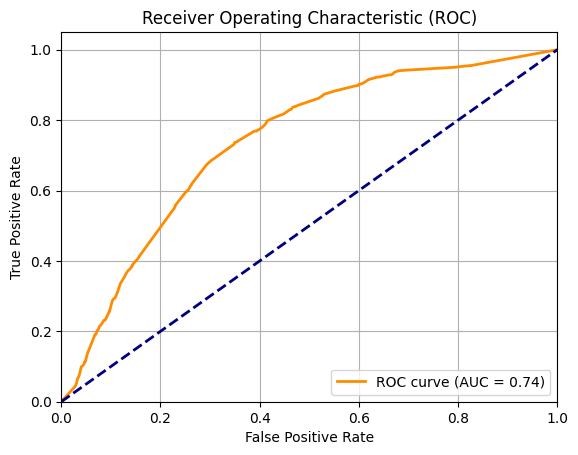

Tree depth 12
goal                       0.220623
create_to_launch_days      0.141331
canceled                   0.086782
launch_to_deadline_days    0.061162
name_len_clean             0.050800
launched_at_yr             0.044051
deadline_hr                0.041620
blurb_len_clean            0.038748
deadline_day               0.038400
launched_at_hr             0.038010
created_at_hr              0.034797
static_usd_rate            0.029450
created_at_day             0.025906
created_at_month           0.024746
deadline_month             0.024678
launched_at_day            0.021066
world                      0.018736
launched_at_month          0.011670
new                        0.010326
LaunchedTuesday            0.009402
app                        0.007825
disable_communication      0.007381
help                       0.006254
TOPCOUNTRY                 0.005066
DeadlineWeekend            0.001168
dtype: float64
Cross-validation scores: [0.66182171 0.72674419 0.75714978 0.75181774 0

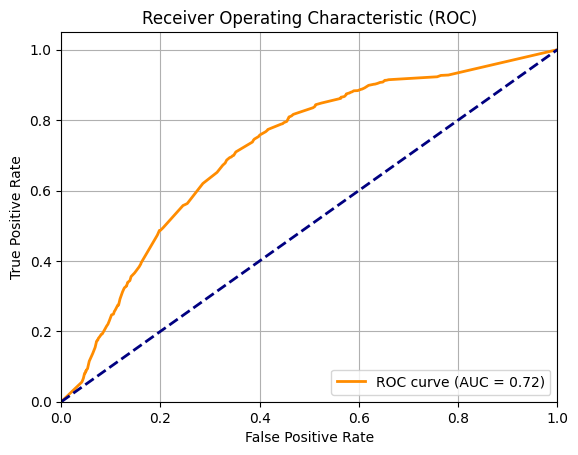

Tree depth 13
goal                       0.192405
create_to_launch_days      0.138586
canceled                   0.075473
launch_to_deadline_days    0.062571
name_len_clean             0.045402
deadline_day               0.045168
deadline_hr                0.044183
created_at_hr              0.043154
blurb_len_clean            0.040333
launched_at_yr             0.039128
launched_at_hr             0.037977
created_at_day             0.032162
static_usd_rate            0.029885
deadline_month             0.027577
launched_at_day            0.026962
created_at_month           0.026687
world                      0.020290
launched_at_month          0.019982
new                        0.011902
help                       0.011441
LaunchedTuesday            0.008599
app                        0.007772
disable_communication      0.006419
TOPCOUNTRY                 0.004353
DeadlineWeekend            0.001589
dtype: float64
Cross-validation scores: [0.66763566 0.71705426 0.73824527 0.75084828 0

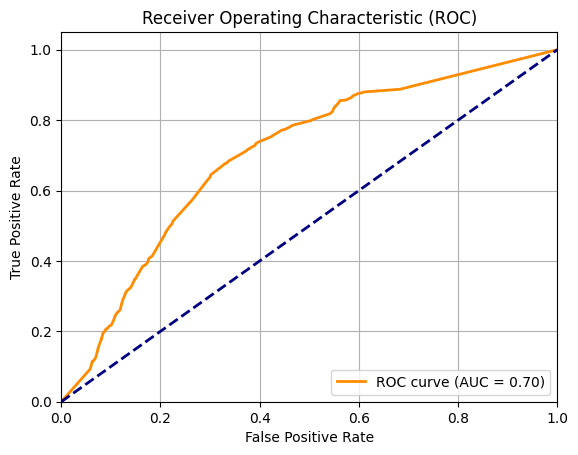

Tree depth 14
goal                       0.176158
create_to_launch_days      0.137142
launch_to_deadline_days    0.067381
canceled                   0.066486
deadline_day               0.051966
blurb_len_clean            0.045587
created_at_hr              0.044276
deadline_hr                0.044123
launched_at_hr             0.041783
name_len_clean             0.040988
launched_at_yr             0.037981
created_at_day             0.034299
launched_at_day            0.033334
static_usd_rate            0.032669
created_at_month           0.032223
deadline_month             0.024630
launched_at_month          0.020027
world                      0.017918
new                        0.014672
help                       0.009278
LaunchedTuesday            0.008122
app                        0.006304
disable_communication      0.005655
TOPCOUNTRY                 0.004223
DeadlineWeekend            0.002776
dtype: float64
Cross-validation scores: [0.6497093  0.70397287 0.7324285  0.74551624 0

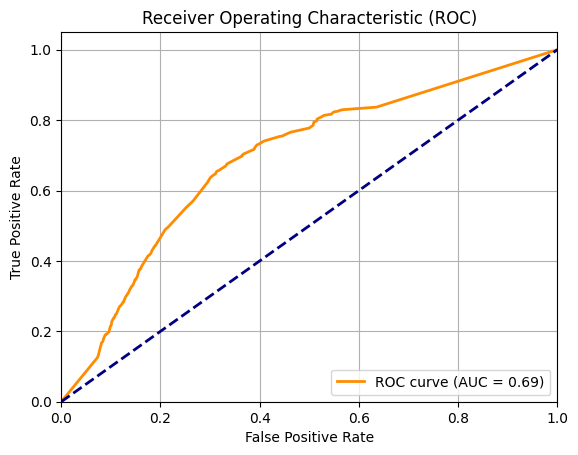

Tree depth 15
goal                       0.171188
create_to_launch_days      0.136176
launch_to_deadline_days    0.062186
canceled                   0.059521
created_at_hr              0.052773
deadline_day               0.052330
deadline_hr                0.050196
blurb_len_clean            0.046095
name_len_clean             0.041340
launched_at_hr             0.040915
launched_at_day            0.035448
created_at_day             0.034071
static_usd_rate            0.033377
launched_at_yr             0.032412
launched_at_month          0.027700
deadline_month             0.026844
created_at_month           0.026069
world                      0.018202
new                        0.013283
help                       0.010681
app                        0.007434
LaunchedTuesday            0.007333
disable_communication      0.005062
TOPCOUNTRY                 0.004709
DeadlineWeekend            0.004653
dtype: float64
Cross-validation scores: [0.64825581 0.69476744 0.71497819 0.75181774 0

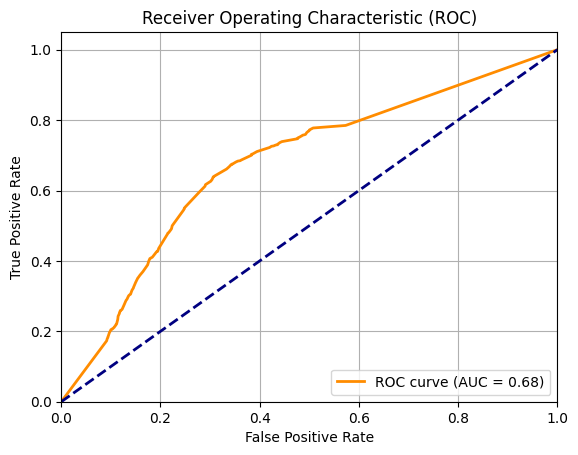

Tree depth 16
goal                       0.159074
create_to_launch_days      0.125663
launch_to_deadline_days    0.062824
deadline_day               0.057369
deadline_hr                0.054449
canceled                   0.054226
created_at_hr              0.052164
launched_at_day            0.045106
blurb_len_clean            0.044941
name_len_clean             0.040119
launched_at_hr             0.040074
created_at_day             0.036724
launched_at_yr             0.035285
static_usd_rate            0.034021
deadline_month             0.029198
created_at_month           0.027351
launched_at_month          0.025030
world                      0.017173
new                        0.013957
help                       0.012974
LaunchedTuesday            0.008901
app                        0.008281
TOPCOUNTRY                 0.006258
disable_communication      0.004612
DeadlineWeekend            0.004226
dtype: float64
Cross-validation scores: [0.64728682 0.69089147 0.71013088 0.73969947 0

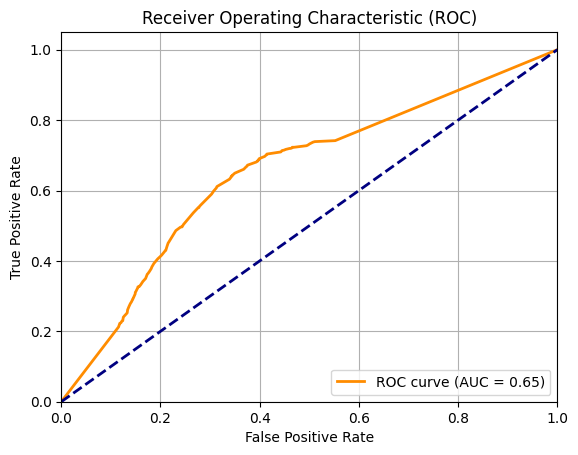

Tree depth 17
goal                       0.151227
create_to_launch_days      0.127898
launch_to_deadline_days    0.065037
deadline_day               0.056552
deadline_hr                0.054012
created_at_hr              0.051714
canceled                   0.050414
launched_at_day            0.046878
blurb_len_clean            0.045220
launched_at_hr             0.043417
created_at_day             0.042564
name_len_clean             0.038941
deadline_month             0.033063
launched_at_yr             0.032825
static_usd_rate            0.032665
created_at_month           0.028539
launched_at_month          0.026655
world                      0.016673
new                        0.011278
help                       0.010645
app                        0.008528
LaunchedTuesday            0.008085
DeadlineWeekend            0.007169
TOPCOUNTRY                 0.005714
disable_communication      0.004288
dtype: float64
Cross-validation scores: [0.65455426 0.68604651 0.69995153 0.73339796 0

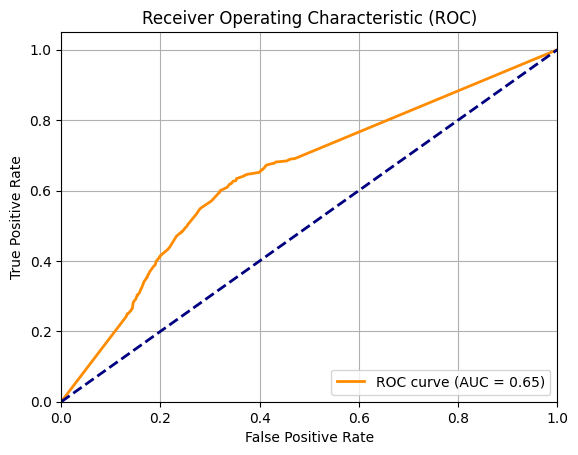

Tree depth 18
goal                       0.149215
create_to_launch_days      0.131468
launch_to_deadline_days    0.068729
deadline_day               0.058324
created_at_hr              0.053506
deadline_hr                0.050616
canceled                   0.047082
launched_at_day            0.046227
blurb_len_clean            0.045918
created_at_day             0.044995
launched_at_hr             0.039737
name_len_clean             0.038897
static_usd_rate            0.032854
launched_at_yr             0.032232
deadline_month             0.029713
created_at_month           0.028477
launched_at_month          0.027280
new                        0.015321
world                      0.015096
help                       0.011802
app                        0.008172
LaunchedTuesday            0.007993
TOPCOUNTRY                 0.006094
DeadlineWeekend            0.005993
disable_communication      0.004260
dtype: float64
Cross-validation scores: [0.64341085 0.68604651 0.69849733 0.726127   0

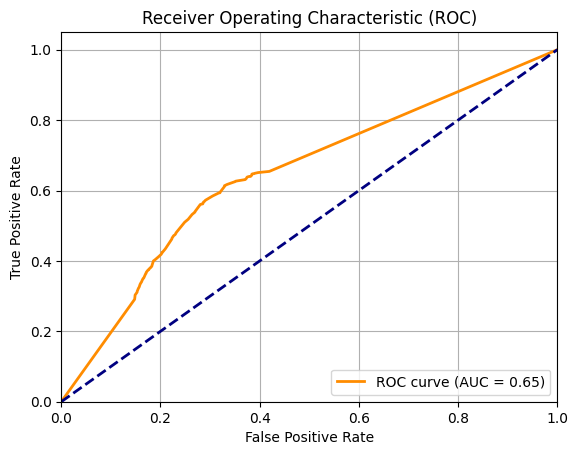

Tree depth 19
goal                       0.141108
create_to_launch_days      0.129352
launch_to_deadline_days    0.065203
deadline_day               0.058076
created_at_hr              0.053289
deadline_hr                0.050986
launched_at_day            0.050524
blurb_len_clean            0.050164
launched_at_hr             0.046354
created_at_day             0.045161
canceled                   0.044925
name_len_clean             0.040993
launched_at_yr             0.033651
created_at_month           0.032921
static_usd_rate            0.032087
deadline_month             0.030396
launched_at_month          0.024813
world                      0.014112
new                        0.012408
help                       0.010839
LaunchedTuesday            0.008460
app                        0.008439
TOPCOUNTRY                 0.006033
DeadlineWeekend            0.005471
disable_communication      0.004234
dtype: float64
Cross-validation scores: [0.63468992 0.68895349 0.69365002 0.72903539 0

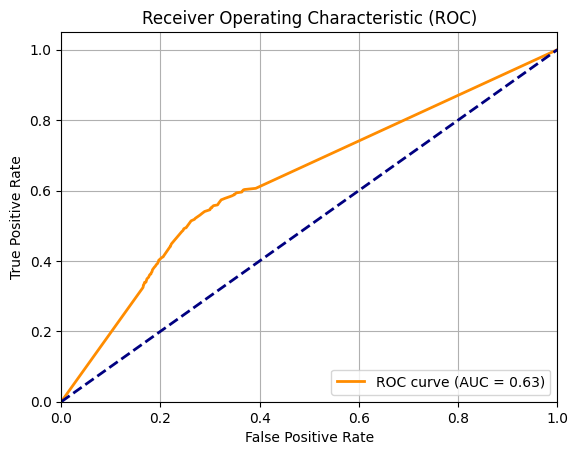

In [318]:
model_score_stats = []

for i in range(1, 20):
    print(f"Tree depth {i}")

    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train)

    cv_scores = cross_val_score(clf, X, y, cv=10)

    #examine the feature importance
    importances = clf.feature_importances_
    feature_ranks = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    filtered_ranks = feature_ranks[feature_ranks > 0]
    print(filtered_ranks)
    #for index, value in zip(feature_ranks.index, feature_ranks.values):
    #    print(index, value)
    #print(feature_ranks)
    #split_feature_index = clf.tree_.feature[0]
    #print("Split on feature:", X.columns[split_feature_index])

    model_score_stats.append({"model": clf, "depth": i, "mean_score": cv_scores.mean(), "score_std":cv_scores.std()})

    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.4f}")
    print(f"Standard deviation of accuracy: {cv_scores.std():.4f}")

    y_scores = clf.predict_proba(X_test)[:, 1]  # Get probability for the positive class

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
        

In [319]:
max_score = max(model_score_stats, key=lambda x: x['mean_score'])
min_std = min(model_score_stats, key=lambda x: x['score_std'])

print(f"maximum average score parameters {max_score}")
print(f"minimum score standard deviation parameters {min_std}")

maximum average score parameters {'model': DecisionTreeClassifier(max_depth=3, random_state=42), 'depth': 3, 'mean_score': np.float64(0.7225677965783254), 'score_std': np.float64(0.029910232490281213)}
minimum score standard deviation parameters {'model': DecisionTreeClassifier(max_depth=1, random_state=42), 'depth': 1, 'mean_score': np.float64(0.7083171756341897), 'score_std': np.float64(0.00018790924785288627)}


### Test Results ###

In cross validation testing, it appears that a tree depth of 12 has the highest average score for the 10 folds. A depth of 19 has the minimum standard deviation among the scores. The standard deviation in both cases is very low.

After dropping `usd_pledged`, the tree depth values changed to 7 and 11 respectively.

After removing all features that can leak, the depth values changed to 3 and 1 respectively.